In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Compute n of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# input image dims
image_size = x_train.shape[1]

# resize & normalize
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test  = np.reshape(x_test, [-1, image_size, image_size, 1])

x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

In [6]:
# network params
# image is processed as (square grayscale)

input_shape = (image_size, image_size, 1)
batch_size =128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

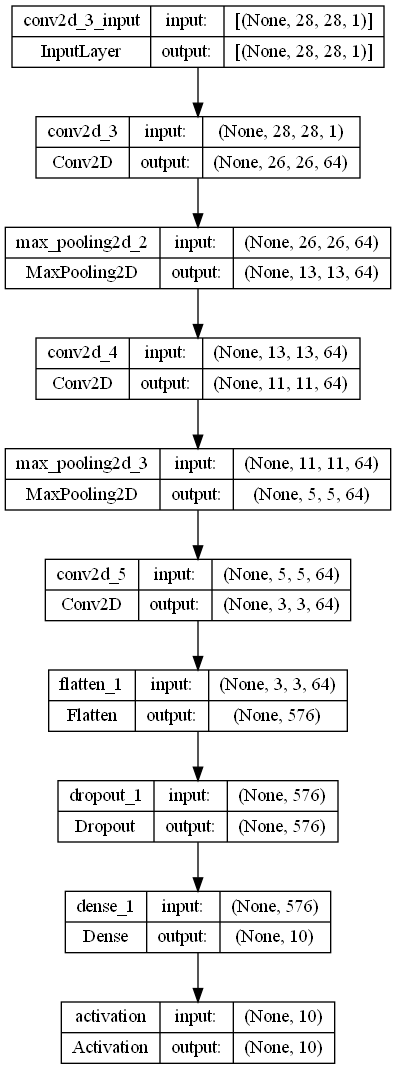

In [11]:
# mode is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters, 
                 kernel_size=kernel_size, 
                 activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters, 
                 kernel_size=kernel_size, 
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters, 
                 kernel_size=kernel_size, 
                 activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [13]:
# loss function for one-hot vector
# adam optimizer
# accuracy metric
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=50, batch_size=batch_size)
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

print("\nTest accuracy: %.1f%%" % (100 * acc))

Epoch 1/50
469/469 [==============================] - 24s 50ms/step - loss: 0.0658 - accuracy: 0.9797
Epoch 2/50
469/469 [==============================] - 23s 49ms/step - loss: 0.0448 - accuracy: 0.9859
Epoch 3/50
469/469 [==============================] - 22s 48ms/step - loss: 0.0360 - accuracy: 0.9890
Epoch 4/50
469/469 [==============================] - 22s 47ms/step - loss: 0.0297 - accuracy: 0.9903
Epoch 5/50
469/469 [==============================] - 22s 47ms/step - loss: 0.0253 - accuracy: 0.9918
Epoch 6/50
469/469 [==============================] - 22s 47ms/step - loss: 0.0218 - accuracy: 0.9932
Epoch 7/50
469/469 [==============================] - 22s 47ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 8/50
469/469 [==============================] - 23s 48ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 9/50
469/469 [==============================] - 22s 48ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 10/50
469/469 [==============================] - 22s 47ms/step - loss: 0.012